In [101]:
import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

df = pd.read_csv('iris.csv', names = names)

print(df.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [98]:
# data quality assessment
df.describe()

# The total amount of data is 150 and there is no missing entry.
# We can get the mean, the min and the max values from this table.

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'class')

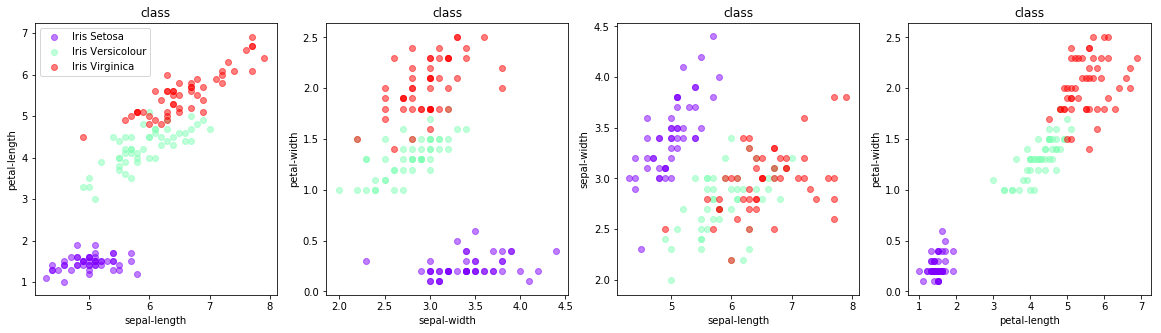

In [191]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

class_label = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

def scatter_plot_by_category(feat, x, y):
    alpha = 0.5
    gs = df.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1][x], g[1][y], color=c, alpha=alpha)
        
f1 = plt.figure(figsize=(20,5))

plt.subplot(141)
scatter_plot_by_category('class', 'sepal-length', 'petal-length')
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.title('class')
plt.legend(labels=class_label, loc='upper left')

plt.subplot(142)
scatter_plot_by_category('class', 'sepal-width', 'petal-width')
plt.xlabel('sepal-width')
plt.ylabel('petal-width')
plt.title('class')

plt.subplot(143)
scatter_plot_by_category('class', 'sepal-length', 'sepal-width')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('class')

plt.subplot(144)
scatter_plot_by_category('class', 'petal-length', 'petal-width')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.title('class')

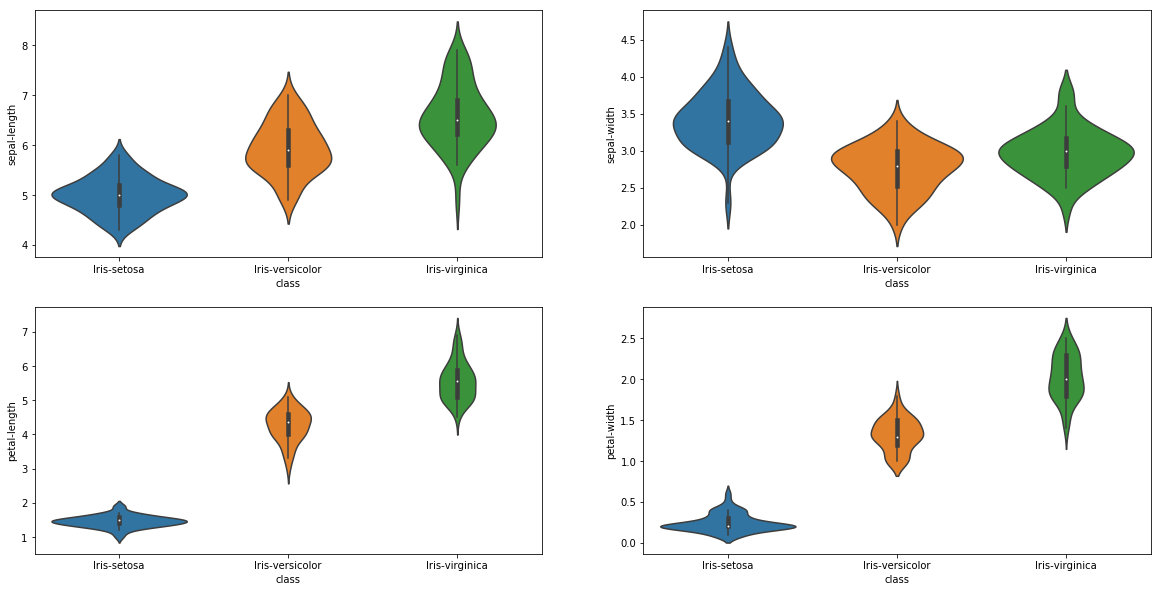

In [104]:
import seaborn as sb

plt.figure(figsize=(20, 10))
for column_index, column in enumerate(df.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=df)

In [300]:
from sklearn.model_selection import train_test_split

all_inputs = df[['sepal-length', 'sepal-width',
                             'petal-length', 'petal-width']].values
all_classes = df['class'].values

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state = 2)

In [301]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(X_train,y_train)
dists = knc.kneighbors_graph(mode = 'distance',n_neighbors = 10).toarray()

print('Ten most similar points: \n',knc.kneighbors(X_test[:3],n_neighbors = 10, return_distance = False))
print('Distance: \n',dists[0])

Ten most similar points: 
 [[  6 102 105  52 109  48  68  67  61  10]
 [102  22  91  47  45  97  40  21  65  68]
 [ 81  23  66  54  80  32  27 110  64  20]]
Distance: 
 [0.         0.         0.         0.         0.         0.83643371
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.91275009 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.78598461 0.92292847 0.
 0.48993354 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.76674434 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.87543016 0.         0.73148129
 0.         0.         0.         0.         0.         0.36787572
 0.         0.         0.         0.    

In [303]:
# Prediction
y_predict = knc.predict(X_test)
y_predict_prob = knc.predict_proba(X_test)
print('Prediction for first three samples in test set: ',y_predict[:3])
print('Probabilities for each classes: ',y_predict_prob[:3])

# Evaluation
from sklearn.metrics import classification_report
print ('Accuracy of knc:',knc.score(X_test,y_test))
print (classification_report(y_predict,y_test))

Prediction for first three samples in test set:  ['Iris-setosa' 'Iris-setosa' 'Iris-virginica']
Probabilities for each classes:  [[1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]]
Accuracy of knc: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



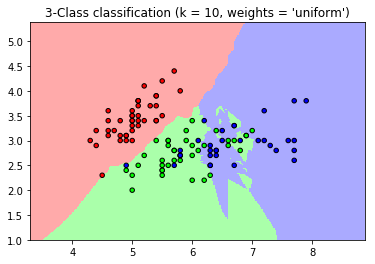

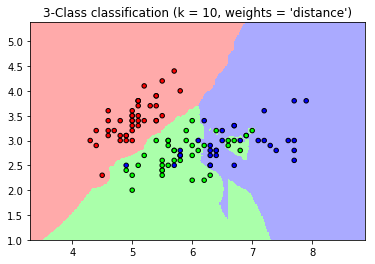

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import LabelEncoder

n_neighbors = 10

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_train[:, :2]
label_encoder = LabelEncoder()
y = label_encoder.fit(y_train).transform(y_train)

h = .02  # step size in the mesh

# Create color map
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    

plt.show()